## Import Packages

In [1]:
import selenium
import pandas as pd
import time
from tqdm import tqdm
import re
import warnings
warnings.filterwarnings('ignore')
from selenium import webdriver
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
from selenium.webdriver.common.by import By

In [2]:
# Connecting to the webdriver
driver = webdriver.Chrome()
# Opening Amazon.in in chrome browser
url='http://www.amazon.in/'
driver.get(url)
time.sleep(1)
# Taking input from user about product search
user_input=input('Enter the title of Product you are interested in: ')
# finding search menu
search=driver.find_element(By.XPATH,'//*[@id="twotabsearchtextbox"]')
# writting the user input product search
search.send_keys(user_input)
# Finding Search button and clicking onit
search_button=driver.find_element(By.XPATH,'//input[@id="nav-search-submit-button"]').click()

Enter the title of Product you are interested in: guitar


-------------------------------------------------------------------------------------------------------------------------------

In [3]:
# Make Empty list to scrap data
Brand =[]
Product = []
Price =[]
Return =[]
Excepted_delivery =[]
Availability =[]
URL =[]

In [4]:
#  scrape URL of the searched product for first 3 pages

for page in range(3):
    url_tags=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url_tags:
        URL.append(i.get_attribute('href'))
    time.sleep(5)
    print(len(URL))
    # locating next page button and clicking
    
    next_page=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    next_page.click()
    time.sleep(11)

68
134
200


In [5]:

for i in tqdm(URL):
    driver.get(i)
    time.sleep(2)
    
    # Extracting Brand Name
    try:
        brand=driver.find_element(By.XPATH,'//a[@id="bylineInfo"]')
        Brand.append(brand.text.replace('Visit the','').replace('Brand:','')) 
    except NoSuchElementException:
        Brand.append('-')
        
    time.sleep(3)
    
    # Extracting product name
    try:
        product =driver.find_element(By.XPATH,'//span[@id="productTitle"]')
        Product.append(product.text)
    except NoSuchElementException:
        Product.append('-')
    time.sleep(3)
    
    # Extracting Price 
    try:
        price=driver.find_element(By.XPATH,'//span[@class = "a-price-whole"]')
        Price.append(price.text)
    except NoSuchElementException:
        Price.append('-')
    time.sleep(3)
    
    # Extracting Return or exchange detail 
    try:
        replacement=driver.find_element(By.XPATH,'//*[@id="RETURNS_POLICY"]/span/div[2]/a')
        Return.append(replacement.text)
    except NoSuchElementException:
        Return.append('-')
    time.sleep(3)
    
    # Extracting Expected Delivery 
    try:
        delivery=driver.find_element(By.XPATH,'//*[@id="mir-layout-DELIVERY_BLOCK-slot-PRIMARY_DELIVERY_MESSAGE_LARGE"]/span/span')
        Excepted_delivery.append(delivery.text)
    except NoSuchElementException:
        Excepted_delivery.append('-')
    time.sleep(3)
    
    # Extracting Availability 
    try:
        availability=driver.find_element(By.XPATH,'//span[@class="a-size-medium a-color-success"]')
        Availability.append(availability.text)
    except NoSuchElementException:
        Availability.append('-')
    time.sleep(3)

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [1:37:19<00:00, 29.20s/it]


In [9]:

Guitar=pd.DataFrame({'Brand':Brand,'Product':Product,'Price':Price,'Return/Exchange':Return,
                     'Expected Delivery':Excepted_delivery,'Availability':Availability,'URL':URL},index=pd.RangeIndex(1,201,name='index'))
Guitar.to_csv('guitar.csv')

In [10]:
df = pd.read_csv('guitar.csv')
df

,index,Brand,Product,Price,Return/Exchange,Expected Delivery,Availability,URL
0,1,Kadence Store,Kadence Frontier guitar with Online Guitar lea...,"4,949",7 days Replacement,"Thursday, 15 December",NaN,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,2,Kadence Store,Kadence Slowhand Premium Jumbo Semi Acoustic G...,"9,900",7 days Replacement,"Saturday, 17 December",NaN,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,3,Intern Store,INTERN 40 inches Acoustic Guitar with Pick-up ...,"5,190",7 days Replacement,"Thursday, 15 December",In stock.,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,4,Hontral,Hontral S4 String Decor Guitar Children's Musi...,899,7 days Returnable,"Friday, 16 December",In stock.,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,5,Intern Store,"Intern INT-38C Right hand Acoustic Guitar Kit,...","2,299",7 days Replacement,"Thursday, 15 December",In stock.,https://www.amazon.in/Intern-INT-38C-Acoustic-...
...,...,...,...,...,...,...,...,...
195,196,CHANGER,CHANGER rosewood 21 fret acoustic guitar black...,"3,690",7 days Returnable,"Monday, 19 December",In stock.,https://www.amazon.in/CHANGER-rosewood-acousti...
196,197,blueberry Store,"Blueberry 38C, 38"" Acoustic Guitar Kit with Ba...","2,395",7 days Replacement,"Saturday, 17 December",In stock.,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
197,198,Right Search,Right Search ® Mini Musical Guitar Toy _g1,299,7 days Replacement,"Sunday, 18 December",In stock.,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
198,199,blueberry Store,Blueberry D38 38 Inches Trussrod Lindenwood Ac...,"2,895",7 days Replacement,"Saturday, 17 December",In stock.,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


-------------------------------------------------------------------------------------------------------------------------------

##### Fruits

In [14]:
# Connecting to the webdriver
driver = webdriver.Chrome()
# Opening Amazon.in in chrome browser
url='http://images.google.com/'
driver.get(url)
time.sleep(5)
#  Finding Search bar website by class
search=driver.find_element(By.XPATH,'//input[@class="gLFyf"]')
# Feeding input 'Fruits' in search bar
search.send_keys('Fruits')
# Finding Search button for clicking through class name
search_button=driver.find_element(By.CLASS_NAME,'zgAlFc').click()  #/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button
time.sleep(7)

In [22]:
img=[]
source=[]
images=driver.find_elements(By.XPATH,'//div[@class=" bRMDJf islir"]/img')
time.sleep(3)
img_source=driver.find_elements(By.XPATH,'//div[@class="dmeZbb"]')
time.sleep(3)
for i in images[:10]:
    img.append(i.get_attribute('src'))
for i in img_source[:10]:
    source.append(i.text)

['', '', '', '', '', '', '', '', '', ''] ['Good Housekeeping', 'Dairy Council of California', 'Pinterest', 'Science News Explores', 'Memozor', 'Vecteezy', 'OnlyMyEnglish', 'The Kitchn', "Byju's", 'Cleveland Clinic']

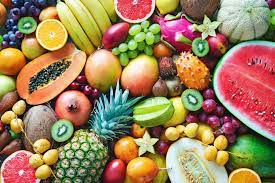
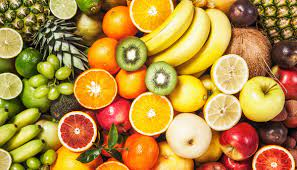
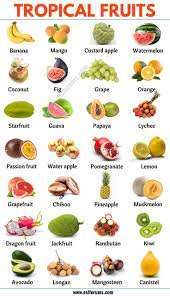
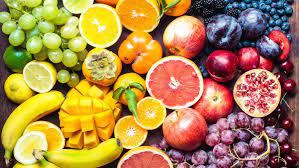
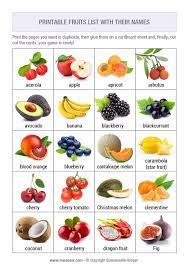
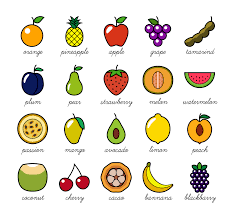
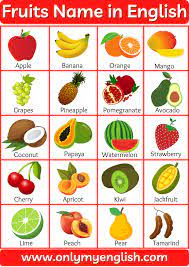
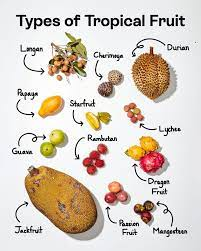
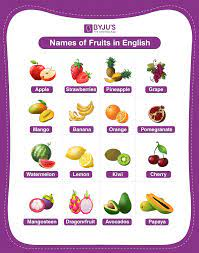
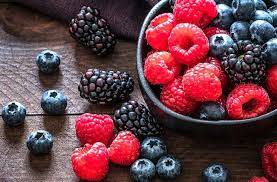

In [24]:
print(img,source)

##### Cars

In [25]:
# Connecting to the webdriver
driver = webdriver.Chrome()
# Opening Amazon.in in chrome browser
url='http://images.google.com/'
driver.get(url)
time.sleep(5)
#  Finding Search bar website by class
search=driver.find_element(By.XPATH,'//input[@class="gLFyf"]')
# Feeding input 'Fruits' in search bar
search.send_keys('cars')
# Finding Search button for clicking through class name
search_button=driver.find_element(By.CLASS_NAME,'zgAlFc').click()  #/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button
time.sleep(7)

['', '', '', '', '', '', '', '', '', ''] ['Forbes', 'Wikipedia', 'Pixar Animation Studios', 'Disney Plus', 'Motor1.com', 'Forbes', 'IMDb', 'Rotten Tomatoes', 'www.maserati.com', 'Car and Driver']

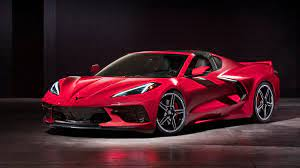
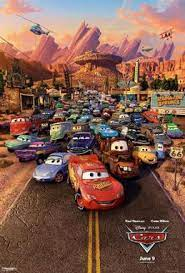
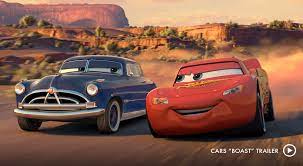
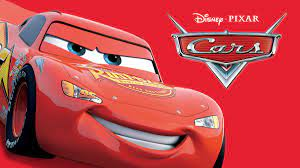
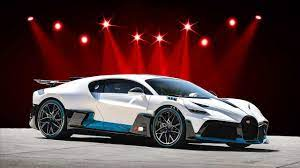
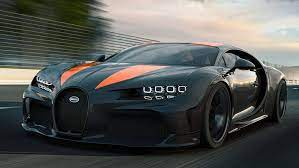
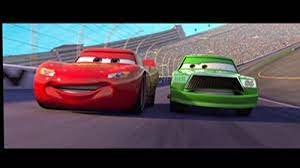
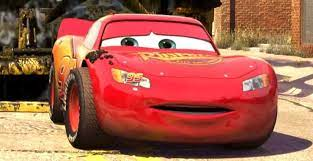
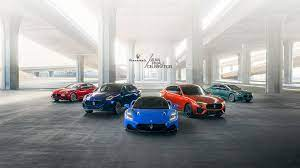
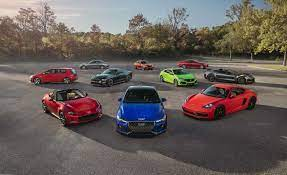

In [26]:
img=[]
source=[]
images=driver.find_elements(By.XPATH,'//div[@class=" bRMDJf islir"]/img')
time.sleep(3)
img_source=driver.find_elements(By.XPATH,'//div[@class="dmeZbb"]')
time.sleep(3)
for i in images[:10]:
    img.append(i.get_attribute('src'))
for i in img_source[:10]:
    source.append(i.text)
print(img,source)
driver.close()

##### Machine Learning

In [2]:
# Connecting to the webdriver
driver = webdriver.Chrome()
# Opening Amazon.in in chrome browser
url='http://images.google.com/'
driver.get(url)
time.sleep(5)
#  Finding Search bar website by class
search=driver.find_element(By.XPATH,'//input[@class="gLFyf"]')
# Feeding input 'machine learning' in search bar
search.send_keys('machine learning')
# Finding Search button for clicking through class name
search_button=driver.find_element(By.CLASS_NAME,'zgAlFc').click()  #/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button
time.sleep(7)

['', '', '', '', '', '', '', '', '', ''] ['Fore School of Management', 'Forbes', 'WordStream', 'ATRIA Innovation', 'Built In', 'Towards Data Science', 'Forbes', 'Encyclopedia Britannica', 'DataFlair', 'Spiceworks']

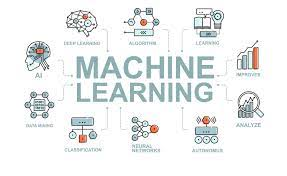
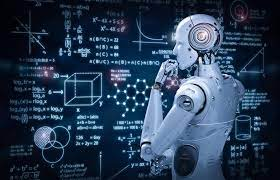
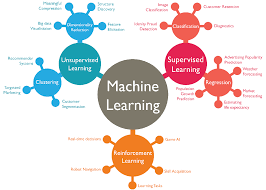
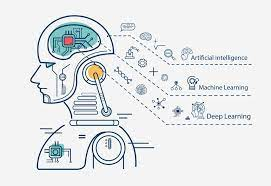
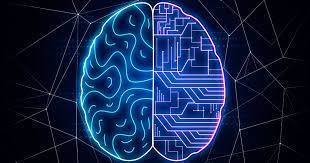
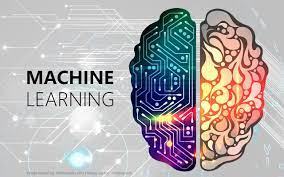
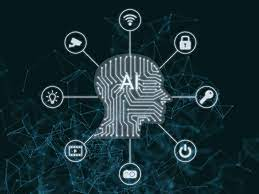
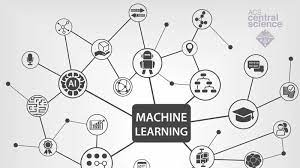
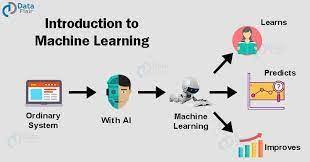
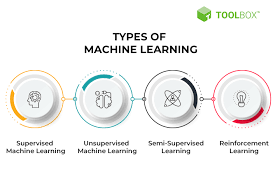

In [3]:
img=[]
source=[]
images=driver.find_elements(By.XPATH,'//div[@class=" bRMDJf islir"]/img')
time.sleep(3)
img_source=driver.find_elements(By.XPATH,'//div[@class="dmeZbb"]')
time.sleep(3)
for i in images[:10]:
    img.append(i.get_attribute('src'))
for i in img_source[:10]:
    source.append(i.text)
print(img,source)
driver.close()

##### Guitars

In [4]:
# Connecting to the webdriver
driver = webdriver.Chrome()
# Opening Amazon.in in chrome browser
url='http://images.google.com/'
driver.get(url)
time.sleep(5)
#  Finding Search bar website by class
search=driver.find_element(By.XPATH,'//input[@class="gLFyf"]')
# Feeding input 'guitars' in search bar
search.send_keys('guitars')
# Finding Search button for clicking through class name
search_button=driver.find_element(By.CLASS_NAME,'zgAlFc').click()  #/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button
time.sleep(7)

['', '', '', '', '', '', '', '', '', ''] ['Alvarez Guitars', 'Wikipedia', 'prsguitars.com', 'Guitar.com', 'YouTube', 'Guitar.com', 'Facebook', 'ESP Guitars', 'Wikipedia', 'www.tanglewoodguitars.co.uk']

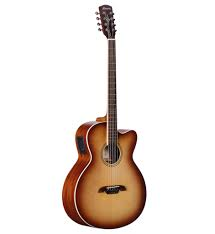
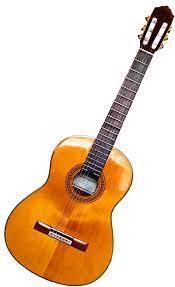
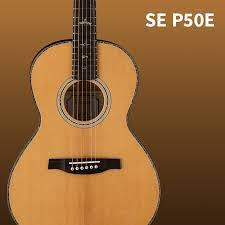
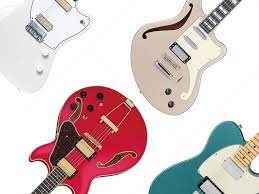
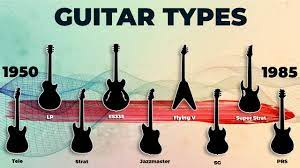
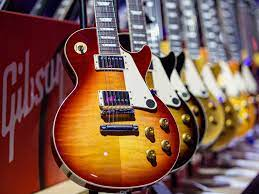
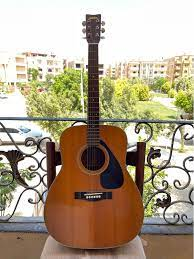
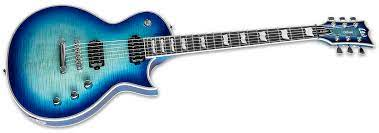
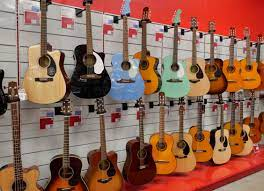
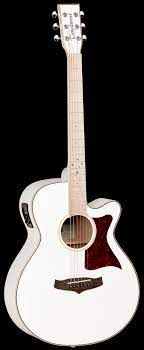

In [5]:
img=[]
source=[]
images=driver.find_elements(By.XPATH,'//div[@class=" bRMDJf islir"]/img')
time.sleep(3)
img_source=driver.find_elements(By.XPATH,'//div[@class="dmeZbb"]')
time.sleep(3)
for i in images[:10]:
    img.append(i.get_attribute('src'))
for i in img_source[:10]:
    source.append(i.text)
print(img,source)
driver.close()

##### Cakes

In [6]:
# Connecting to the webdriver
driver = webdriver.Chrome()
# Opening Amazon.in in chrome browser
url='http://images.google.com/'
driver.get(url)
time.sleep(5)
#  Finding Search bar website by XPATH
search=driver.find_element(By.XPATH,'//input[@class="gLFyf"]')
# Feeding input 'cakes' in search bar
search.send_keys('cakes')
# Finding Search button for clicking through class name
search_button=driver.find_element(By.CLASS_NAME,'zgAlFc').click()  #/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button
time.sleep(7)

['', '', '', '', '', '', '', '', '', ''] ["Woman's Day", 'BBC Good Food', 'Taste', 'BBC Good Food', 'Wikipedia', 'Taste', 'Allrecipes', 'BBC Good Food', 'BBC', 'CakeWhiz']

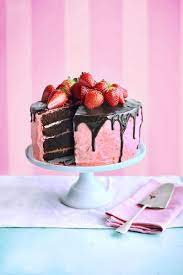
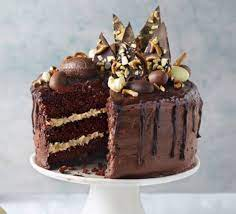
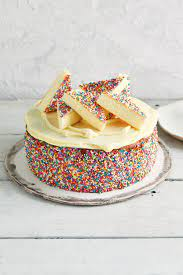
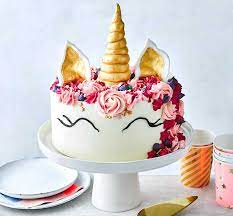
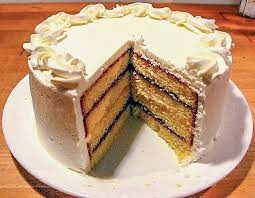
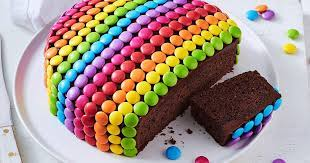
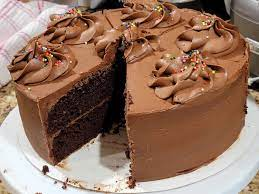
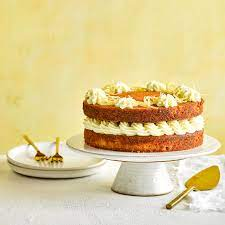
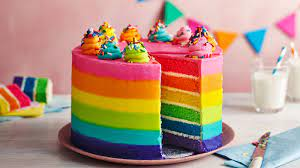
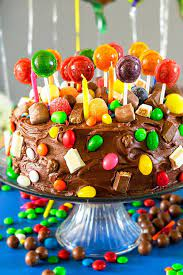

In [7]:
img=[]
source=[]
images=driver.find_elements(By.XPATH,'//div[@class=" bRMDJf islir"]/img')
time.sleep(3)
img_source=driver.find_elements(By.XPATH,'//div[@class="dmeZbb"]')
time.sleep(3)
for i in images[:10]:
    img.append(i.get_attribute('src'))
for i in img_source[:10]:
    source.append(i.text)
print(img,source)
driver.close()

------------------------------------------------------------------------------------------------------------------------------

In [2]:
# Connecting to the webdriver
driver=webdriver.Chrome()
# Opening Amazon.in in chrome browser
url='http://www.flipkart.com/'
driver.get(url)
time.sleep(3)

try:
    login_window=driver.find_element(By.XPATH,'//button[@class="_2KpZ6l _2doB4z"]').click()
except NoSuchElementException:
    print('Login window is not present')

# Finding Search bar website by XPATH
search=driver.find_element(By.XPATH,'//input[@class="_3704LK"]')
# Feeding input 'Oneplus Nord' in search bar
search.send_keys('Oneplus Nord')
# Finding Search button for clicking it
search_button=driver.find_element(By.XPATH,'//button[@class="L0Z3Pu"]').click()  
time.sleep(7)

In [3]:
# Making empty list toscrape data
Brand=[] 
Smartphone=[]
Colour=[]
RAM=[]
Storage_ROM=[]
Primary_Camera=[]
Secondary_Camera=[]
Display_Size=[]
Battery_Capacity=[]
Price=[]
URL=[]

In [4]:
# Extracting the URLs
url=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
time.sleep(3)
for i in url:
    URL.append(i.get_attribute('href'))

In [5]:
from tqdm import tqdm
for i in tqdm(URL):
    driver.get(i)
    time.sleep(3)
    
    # Expanding specification table by clicking on read more button
    try:
        Read_more=driver.find_element(By.XPATH,'//button[@class="_2KpZ6l _1FH0tX"]')
        Read_more.click()
        
    except NoSuchElementException:
        print('NoSuchElementException Occur')
        pass
    
    # Extracting Brand Name via Xpath
    try:
        brand=driver.find_element(By.XPATH,'//span[@class="B_NuCI"]')
        Brand.append(brand.text.split()[0])
    
    except NoSuchElementException:
        Brand.append('-')
        
    # Extracting Smartphone Model via Xpath
    try:
        smartphone=driver.find_element(By.XPATH,'//div[@class="_3k-BhJ"][1]/table/tbody/tr[3]/td[2]/ul/li')
        Smartphone.append(smartphone.text)
    
    except NoSuchElementException:
        Smartphone.append('-')
        
    # Extracting Colour via Xpath
    try:
        colour=driver.find_element(By.XPATH,'//div[@class="_3k-BhJ"][1]/table/tbody/tr[4]/td[2]/ul/li')
        Colour.append(colour.text)
    
    except NoSuchElementException:
        Colour.append('-')
    
    # Extracting RAM & ROM 
    
    try:
        memory=driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[7]/div[1]/div/div[2]/ul/li[1]')
        RAM.append(memory.text.split('|')[0])
        Storage_ROM.append(memory.text.split('|')[1])
    
    except NoSuchElementException:
        RAM.append('-')
        Storage_ROM.append('-')
        
    # Extracting primary camera detail via Xpath
    try:
        primary_camera=driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[7]/div[1]/div/div[2]/ul/li[3]')
        if '|' not in primary_camera.text:
            
            Primary_Camera.append(primary_camera.text)
            
        else:
            Primary_Camera.append(primary_camera.text.split('|')[0])
            
        
    
    except NoSuchElementException:
        Primary_Camera.append('-')
        
    # Extracting Secondary Camera detail via Xpath
    try:
        secondary_cam=driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[7]/div[1]/div/div[2]/ul/li[3]')
        if '|' in secondary_cam.text:
            
            Secondary_Camera.append(secondary_cam.text.split("|")[1])
            
        else:
            Secondary_Camera.append('Not Mention')
            
            
    
    except NoSuchElementException:
        
        Secondary_Camera.append('-')
    
    # Extracting Display size via Xpath
    try:
        display=driver.find_element(By.XPATH,'//div[@class="_3k-BhJ"][2]/table/tbody/tr[1]/td[2]/ul/li')
        Display_Size.append(display.text)
    except NoSuchElementException:
        Display_Size.append('-')
        

    # Extracting the battery capacity
    try:
        battery=driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[7]/div[1]/div/div[2]/ul/li[4]')
        Battery_Capacity.append(battery.text.replace('Battery',''))
    
    except NoSuchElementException:
        Battery_Capacity.append('-')
    
   
    
    #Extracting Price via X path
    try:
        price=driver.find_element(By.XPATH,'//div[@class="_30jeq3 _16Jk6d"]')
        Price.append(price.text)
    except NoSuchElementException:
        Price.append('-')

100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [04:02<00:00, 10.10s/it]


In [6]:
[len(i) for i in [Brand,Smartphone,Colour,RAM,Storage_ROM,Primary_Camera,Secondary_Camera,Display_Size,Battery_Capacity,Price]]

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24]

In [7]:
phones=pd.DataFrame({'Brand':Brand,'Smartphone':Smartphone,'Colour':Colour,'RAM':RAM,'ROM':Storage_ROM,
                 'Primary_Camera':Primary_Camera,'Secondary_Camera':Secondary_Camera,'Display_Size':Display_Size,
                'Battery_Capacity':Battery_Capacity,'Price':Price,'URL':URL})
phones.to_csv('phone.csv')

In [8]:
df = pd.read_csv('phone.csv')
df

,Unnamed: 0,Brand,Smartphone,Colour,RAM,ROM,Primary_Camera,Secondary_Camera,Display_Size,Battery_Capacity,Price,URL
0,0,OnePlus,Nord CE 2 Lite 5G,Black Dusk,6 GB RAM,128 GB ROM,64MP Rear Camera,Not Mention,16.74 cm (6.59 inch),5000 mAh,"₹19,890",https://www.flipkart.com/oneplus-nord-ce-2-lit...
1,1,OnePlus,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM,128 GB ROM,64MP Rear Camera,Not Mention,16.74 cm (6.59 inch),5000 mAh,"₹19,921",https://www.flipkart.com/oneplus-nord-ce-2-lit...
2,2,OnePlus,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM,128 GB ROM,64MP Rear Camera,16MP Front Camera,16.74 cm (6.59 inch),5000 mAh,"₹19,999",https://www.flipkart.com/oneplus-nord-ce-2-lit...
3,3,OnePlus,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM,128 GB ROM,64MP Rear Camera,Not Mention,16.74 cm (6.59 inch),5000 mAh,"₹19,900",https://www.flipkart.com/oneplus-nord-ce-2-lit...
4,4,OnePlus,Nord CE 2 Lite 5G,Black Dusk,6 GB RAM,128 GB ROM,64MP Rear Camera,Not Mention,16.74 cm (6.59 inch),5000 mAh,"₹19,799",https://www.flipkart.com/oneplus-nord-ce-2-lit...
5,5,OnePlus,Nord CE 2 5G,Bahama Blue,8 GB RAM,128 GB ROM,64MP Rear Camera,Not Mention,16.33 cm (6.43 inch),4500 mAh,"₹24,998",https://www.flipkart.com/oneplus-nord-ce-2-5g-...
6,6,OnePlus,Nord CE 2 Lite 5G,Blue Tide,6 GB RAM,128 GB ROM,64MP Rear Camera,Not Mention,16.74 cm (6.59 inch),5000 mAh,"₹19,989",https://www.flipkart.com/oneplus-nord-ce-2-lit...
7,7,OnePlus,Nord 2T 5G,Gray Shadow,12 GB RAM,256 GB ROM,50MP Rear Camera,Not Mention,16.94 cm (6.67 inch),4500 mAh,"₹33,869",https://www.flipkart.com/oneplus-nord-2t-5g-gr...
8,8,OnePlus,Nord 2T 5G,Jade Fog,8 GB RAM,128 GB ROM,50MP Rear Camera,Not Mention,17.02 cm (6.7 inch),4500 mAh,"₹28,999",https://www.flipkart.com/oneplus-nord-2t-5g-ja...
9,9,OnePlus,Nord 2T 5G,Jade Fog,12 GB RAM,256 GB ROM,50MP Rear Camera,Not Mention,17.02 cm (6.7 inch),4500 mAh,"₹33,999",https://www.flipkart.com/oneplus-nord-2t-5g-ja...


-------------------------------------------------------------------------------------------------------------------------------

In [9]:
# Connecting to the webdriver
driver=webdriver.Chrome()
# Opening Amazon.in in chrome browser
url='http://www.google.com/maps'
driver.get(url)
time.sleep(3)

# Finding search menu by id
Search=driver.find_element(By.ID,"searchboxinput") 
# clearing any previous input in search bar
Search.clear()
# Feeding input specified by user to search menu through send keys
Search.send_keys('Cairo')
# Finding Search button for clicki
Search_button=driver.find_element(By.ID,"searchbox-searchbutton")  
# Clicking search button
Search_button.click()

In [10]:
current_url=driver.current_url
print('Current url :',current_url)

Current url : https://www.google.com/maps/@30.048256,31.3819136,12z


In [11]:
try:
    if "@" in current_url:
        location=current_url.split('@')[1].split(',')
        location
        print('Latitude of given Location:',location[0])
        print('Longitude of given Location:',location[1])
except:
    print('Location detail not found in url')

Latitude of given Location: 30.048256
Longitude of given Location: 31.3819136


-------------------------------------------------------------------------------------------------------------------------------

In [19]:
# Connecting to the webdriver
driver=webdriver.Chrome()
# Opening url in chrome browser
url='https://www.trak.in'
driver.get(url)
driver.maximize_window()
time.sleep(3)

In [18]:
# Finding funding deals bar by xpath
funding_deals=driver.find_element(By.XPATH,'//li[@id="menu-item-1237902"]/a').get_attribute('href')
driver.get(funding_deals)


##### There are no funding deals data available in the website

-------------------------------------------------------------------------------------------------------------------------------

In [26]:
# Connecting to webdriver
driver=webdriver.Chrome()
# Opening url in chrome browser
url='https://www.digit.in'
driver.get(url)
driver.maximize_window()
time.sleep(3)

In [27]:
# Clicking on laptops option button in menu bar
driver.find_element(By.XPATH,'/html/body/div[1]/div/div[4]/ul/li[3]/a').click()
time.sleep(3)

# Clicking on Laptop under table
driver.find_element(By.XPATH,'//div[@class="Filter-wrap"]/div/div/a').click()

# Opening Best gaming laptops link
Gaming_lappy=driver.find_element(By.XPATH,'/html/body/div[6]/div/div[2]/div[2]/ul/li[10]/a').get_attribute('href')
driver.get(Gaming_lappy)
time.sleep(3)

In [28]:
# Making Empty list for scraping data
Laptop_model =[]
Processor =[]
Display = []
OS =[]
Memory =[]
Graphics_processor =[]
Weight =[]
Dimension =[]
Price =[]                            

In [29]:
# Extracting Laptop model via Xpath
laptop_model=driver.find_elements(By.XPATH,'//div[@class="left_side"]/a/h3')
for i in laptop_model:
    Laptop_model.append(i.text)
    
# Extracting processor
processor=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[3]/td[3]')
for i in processor:
    Processor.append(i.text)
    
# Extracting display
display=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[4]/td[3]')
for i in display:
    Display.append(i.text)
    
# Extracting os
os=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[5]/td[3]')
for i in os:
    OS.append(i.text)
    
# Extracting memory
memory=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[6]/td[3]')
for i in memory:
    Memory.append(i.text)

# Extracting graphic
graphic=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[7]/td[3]')
for i in graphic:
    Graphics_processor.append(i.text)
    
# Extracting dimmension
dim=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[8]/td[3]')
for i in dim:
    Dimension.append(i.text.split('&')[0].replace('dimension',''))
    
# Extracting weight
weight=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[8]/td[3]')
for i in weight:
    Weight.append(i.text.split('&')[1].replace('weight',''))
    
# Extracting price
price=driver.find_elements(By.XPATH,'//div[@class="Spcs-details"]/table/tbody/tr[9]/td[3]')
for i in price:
    Price.append(i.text)

In [41]:
# to overcome the missing value  in the price for the 1st laptop to create the dataframe
Price.insert(0,'-')

In [42]:
laptops=pd.DataFrame({'Model':Laptop_model,'Processor':Processor,'Display':Display,'OS':OS,'Memory':Memory,
                 'Graphics Processor':Graphics_processor,'Weight':Weight,'Dimension':Dimension,'Price':Price}
                    ,index=pd.RangeIndex(1,11,name='index'))
laptops.to_csv('gaming_laptops.csv')

In [43]:
df=pd.read_csv('gaming_laptops.csv')
df

,index,Model,Processor,Display,OS,Memory,Graphics Processor,Weight,Dimension,Price
0,1,MSI Titan GT77-12UHS,12th Gen Intel Core i9-12900HX 16 core processor,"17.3″ (3840 x 2160) screen, 120 Hz refresh rate",Windows 11 Home,64 GB DDR5 RAM & 2 TB SSD,16 GB DDR6 NVIDIA GeForce RTX 3080 Ti Graphics...,3.3 kg,397 x 330 x 23 mm,-
1,2,Alienware X17 R2,12th Gen Intel Core i9-12900H 14 core processo...,"17.3″ (1920 x 1080) screen, 360 Hz refresh rate",Windows 11 Home,32 GB DDR5 RAM & 1 TB SSD,16 GB DDR6 NVIDIA GEFORCE RTX 3080 Ti Graphics...,2.96 kg,299 x 359 x 21 mm,"₹ 389,990"
2,3,Acer Predator Triton 500 SE PT516-52s,12th Gen Intel Core i7-12700H 14 core processo...,16″ (2560 x 1600) screen,Windows 11,32 GB DDR5 RAM & 2 TB SSD,8 GB DDR6 NVIDIA GeForce RTX 3070 Ti Graphics ...,2.4 kg,262 x 359 x 20 mm,"₹ 229,990"
3,4,Omen By HP (16-B1371TX),12th Gen Intel Core i7-12700H 14 core processo...,16.1″ (2560 x 1440) screen,Windows 11 Home,8 GB DDR5 RAM & 1 TB SSD,8 GB GDDR6 NVIDIA GeForce RTX 3070 Graphics card,2.32 kg,369 x 248 x 23 mm,"₹ 176,490"
4,5,Acer Predator Helios 300 AN515-45,AMD Ryzen 9-5900HX 8 core processor,"15.6″ (2560 x 1440) screen, 165 Hz refresh rate",Windows 11 Home,16 GB DDR4 RAM & 512 GB SSD,8 GB DDR6 NVIDIA GeForce RTX 3070 Graphics card,2.4 kg,363 x 255 x 23.9 mm,"₹ 172,999"
5,6,MSI Delta 15 (A5EFK-083IN),AMD 5th Gen Ryzen 9-5900HX 8 core processor wi...,"15.6″ (1920 x 1080) screen, 240Hz refresh rate",Windows 11 Home,16 GB DDR4 RAM & 1 TB SSD,10 GB DDR6 AMD Radeon RX 6700M Graphics card,1.9 kg,357 x 247 x 19 mm,"₹ 188,990"
6,7,Omen By HP (16-C0141AX),AMD Ryzen™ 9 5900HX 8 core processor with 3.3 ...,16.1″ (2560 x 1440) screen,Windows 11 Home,16 GB DDR4 RAM & 1 TB NVMe,8 GB GDDR6 AMD Radeon™ RX 6600M Graphics card,2.3 kg,36.92 x 24.8 x 2.3 mm,"₹ 124,990"
7,8,Lenovo Legion 5i Pro (82RF00MGIN),12th Gen Intel Core i7-12700H 14 core processo...,"16″ (2560 x 1600) screen, 165 Hz refresh rate",Windows 11 Home,16 GB DDR5 RAM & 1 TB SSD,6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics card,2.49 kg,360 x 264 x 20 mm,"₹ 163,236"
8,9,Alienware M15 R5 Ryzen Edition Icc-C780001win,AMD Ryzen R7-5800H 8 core processor with 4.40 ...,"15.6″ (1920 x 1080) screen, 165Hz refresh rate",Windows 11 Home,16 GB DDR4 RAM & 512 GB SSD,6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics card,2.69 kg,356.2 x 272.5 x 22.85 mm,"₹ 174,000"
9,10,Lenovo Slim 7 Gen 6 (82K8002JIN),Lenovo Ryzen 7-5800H processor with 3.2 GHz cl...,"15.6″ screen, 165 Hz refresh rate",Windows 11 Home,16 GB DDR4 RAM & 1 TB SSD,6 GB DDR6 NVIDIA GeForce 3060 Max-Q Graphics card,1.9 kg,356 x 252 x 16 mm,"₹ 131,990"


------------------------------------------------------------------------------------------------------------------------------

In [12]:
# Connecting to webdriver
driver=webdriver.Chrome()
time.sleep(1)
# Opening url in chrome browser
url="https://www.forbes.com/"
driver.get(url)
time.sleep(1)

In [13]:
# Clicking on explore button to expand menu
driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div[1]').click()

# Clicking on Billionaire category
driver.find_element(By.XPATH,'//*[@id="globalHeaderMenu"]/div/div[2]/ul/li[1]/div[1]/a').click()

# Clicking on world billionaire tab
driver.find_element(By.XPATH,'//*[@id="globalHeaderMenu"]/div/div[2]/ul/li[1]/div[2]/div[3]/ul/li[1]/a').click()

In [14]:
# Empty list to scrap data
Rank =[]
Name=[]
Net_worth=[]
Age=[]
Citizenship=[]
Source=[]
Industry=[]

In [20]:
# Extracting the available data
for i in driver.find_elements(By.XPATH,'//div[@class="table-row " or @class="table-row expanded"]'):
    Rank.append(i.text.split('\n')[0])
    Name.append(i.text.split('\n')[1])
    Net_worth.append(i.text.split('\n')[2])
    Age.append(i.text.split('\n')[3])
    Citizenship.append(i.text.split('\n')[4])
    Source.append(i.text.split('\n')[5])
    Industry.append(i.text.split('\n')[6])

In [21]:
#creating dataframe
Forbes_list=pd.DataFrame({'Rank':Rank,'Name':Name,'Net Worth':Net_worth,'Age':Age,'Citizenship':Citizenship,
                'Source':Source,'Industry':Industry})
Forbes_list.to_csv('forbes_billionaries_list.csv')

In [22]:
df=pd.read_csv('forbes_billionaries_list.csv')
df

,Unnamed: 0,Rank,Name,Net Worth,Age,Citizenship,Source,Industry
0,0,1.0,Elon Musk,$219 B,50.0,United States,"Tesla, SpaceX",Automotive
1,1,2.0,Jeff Bezos,$171 B,58.0,United States,Amazon,Technology
2,2,3.0,Bernard Arnault & family,$158 B,73.0,France,LVMH,Fashion & Retail
3,3,4.0,Bill Gates,$129 B,66.0,United States,Microsoft,Technology
4,4,5.0,Warren Buffett,$118 B,91.0,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
195,195,192.0,Marcel Herrmann Telles,$10.3 B,72.0,Brazil,beer,Food & Beverage
196,196,197.0,Leon Black,$10 B,70.0,United States,private equity,Finance & Investments
197,197,197.0,Joe Gebbia,$10 B,40.0,United States,Airbnb,Technology
198,198,197.0,David Geffen,$10 B,79.0,United States,"movies, record labels",Media & Entertainment


-------------------------------------------------------------------------------------------------------------------------------

In [2]:
# Connecting to webdriver
driver=webdriver.Chrome()
# Opening url in chrome browser
url="https://www.youtube.com/"
driver.get(url)
time.sleep(3)

In [3]:
# Finding search menu by xpath
Search=driver.find_element(By.XPATH,'//input[@id="search"]') 
# Feeding input video name by user to search menu through send keys
Search.send_keys('Lykke Li - I follow you, deep sea baby')
# Finding Search button for clicking through xpath
Search_button=driver.find_element(By.XPATH,'//button[@id="search-icon-legacy"]/yt-icon')  
# Clicking search button
Search_button.click()
time.sleep(2)

In [4]:
# Clicking on video
link = driver.find_element(By.XPATH,"//yt-formatted-string[@class ='style-scope ytd-video-renderer']").click()
time.sleep(3)

In [7]:
# Scrolling window using ScrollBy method 1000 times
i=1
while True:
    
    i+=500
    driver.execute_script(f"window.scrollTo(0,{i});")
    all_comm=driver.find_elements(By.XPATH,'//ytd-comment-thread-renderer')
    time.sleep(2)
    if len(all_comm)>500:
        break

In [8]:
full = []
for i in all_comm:
    comment = i.find_element(By.XPATH,'.//ytd-expander[@id="expander"]').text
    upvote = i.find_element(By.XPATH,'.//span[@id="vote-count-middle"]').text
    time = i.find_element(By.XPATH,'.//div[@id="header-author"]//yt-formatted-string/a').text
    
    full.append({
        'comment' : comment,
        'upvote' : upvote,
        'time' : time
    })
    
df = pd.DataFrame(full)
df

,comment,upvote,time
0,"2022, Anyone? Настоящая ностальгия",1.9K,1 year ago (edited)
1,This song reminds me of a time in life where e...,959,1 year ago
2,10 anos dessa incrível obra de arte!!!!!,24,3 months ago
3,"I remember my best friend never liked, going t...",1.3K,2 years ago
4,Adoró esta canción no la puedo dejar de escuchar,61,4 years ago
...,...,...,...
514,Крутая песня,,4 years ago
515,Que bonita desde España,,2 years ago
516,Like si eres un@ de los polinesios,216,4 years ago
517,Creo que casi todos conocimos esta canción y e...,,4 years ago


In [9]:
data= df[0:500]
#Print the required data

data.to_csv("i follow you_song.csv", index= True)

data

,comment,upvote,time
0,"2022, Anyone? Настоящая ностальгия",1.9K,1 year ago (edited)
1,This song reminds me of a time in life where e...,959,1 year ago
2,10 anos dessa incrível obra de arte!!!!!,24,3 months ago
3,"I remember my best friend never liked, going t...",1.3K,2 years ago
4,Adoró esta canción no la puedo dejar de escuchar,61,4 years ago
...,...,...,...
495,Necesito saber cómo bailar la del 1:58,4,2 years ago
496,Bellissima canzone,,1 year ago
497,Pensar que ahora esto está de moda y antes cas...,,1 year ago
498,Like si vienes poe parte de los polinesios,257,4 years ago


-------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------

In [15]:
# Connecting to webdriver
driver=webdriver.Chrome()
time.sleep(1)
# Opening url in chrome browser
url="https://www.hostelworld.com/"
driver.get(url)
time.sleep(5)

In [16]:
try:
    #locating the location search bar
    Search = driver.find_element(By.XPATH,'//input[@class="location-text"]')
    # Sending input London in search bar
    Search.send_keys('London')
    time.sleep(7)
    #select london
    london = driver.find_element(By.XPATH,'//*[@id="predicted-search-results"]/li[2]')
    london.click()
    # let'sgo button
    go=driver.find_element(By.XPATH,'/button/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[5]/button')
    go.click()
    
except NoSuchElementException:
    driver.get('https://www.hostelworld.com/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2022-12-19&to=2022-12-22&guests=2&page=1')
time.sleep(7)

In [17]:
#lets find required data
hostel_name = []
distance = []
pvt_prices = []
dorms_price = []
rating = []
reviews = []
over_all = []
facilities = []
description =[]
product_url = []

In [18]:
#fetching hostel name
try:
    name = driver.find_elements(By.XPATH,'//h2[@class="title title-6"]')
    for i in name:
        hostel_name.append(i.text)
except NoSuchElementException:
    hostel_name.append('-')
        
    #fetching distance from city centre
    
try:
    dist = driver.find_elements(By.XPATH,"//div[@class='subtitle body-3']//a//span[1]")
    for i in dist:
        distance.append(i.text.replace('Hostel - ',''))
except NoSuchElementException:
    distance.append('-')
        
for i in driver.find_elements(By.XPATH,"//div[@class='prices-col']"):
 #fetch privates from price
    try:
        pvt_price = driver.find_element(By.XPATH,"//a[@class='prices']//div[1]//div")
        pvt_prices.append(pvt_price.text)
    except NoSuchElementException:
        pvt_prices.append('-')
#fetching dorms from price
for i in driver.find_elements(By.XPATH,"//div[@class='prices-col']"):
    try:
        dorms = driver.find_element(By.XPATH,"//a[@class='prices']//div[2]//div")
        dorms_price.append(dorms.text)
    except NoSuchElementException:
        dorms_price.append('-')
    #fetching facilities
try:
    fac1 = driver.find_elements(By.XPATH,"//div[@class='has-wifi']")
    fac2 = driver.find_elements(By.XPATH,"//div[@class='has-sanitation']")
    for i in fac1:
        for j in fac2:
            facilities.append(i.text +', '+ j.text )
except NoSuchElementException:
    facilities.append('-')
    #lets fetch url of each hostel
p_url = driver.find_elements(By.XPATH,"//div[@class='prices-col']//a[2]")
for i in p_url:
    product_url.append(i.get_attribute('href'))

for i in product_url:
    driver.get(i)
    time.sleep(7)
    #fetching ratings
    try:
        rat = driver.find_element(By.XPATH,"//div[@class='score orange big' or @class='score gray big']")
        rating.append(rat.text)
    except NoSuchElementException:
        rating.append('-')
    #fetching total reviews
        
    try:
        rws = driver.find_element(By.XPATH,"//div[@class='reviews']")
        reviews.append(rws.text.replace('Total Reviews',''))
    except NoSuchElementException:
        reviews.append('-')
    #fetch overall review
    try:
        overall_rw = driver.find_element(By.XPATH,"//div[@class='keyword']//span")
        over_all.append(overall_rw.text)
    except NoSuchElementException:
        over_all.append('-')
    #fetch property description 
    try:
        disc = driver.find_element(By.XPATH,"//div[@class='content']")
        description.append(disc.text)
    except NoSuchElementException:
        over_all.append('-')

In [14]:
#creating dataframe
data = list(zip(hostel_name,distance,rating,reviews,over_all,pvt_prices,dorms_price,facilities,description))       
Hostel = pd.DataFrame(data, columns = ["Hostel name","Distance from city centre","ratings","Total reviews","Overall review","Privates from price","Dorms from price","Facilities","Property Description"])
Hostel.head()

,Hostel name,Distance from city centre,ratings,Total reviews,Overall review,Privates from price,Dorms from price,Facilities,Property Description
0,Wombat's City Hostel London,3.6km from city centre,8.9,14409,Fabulous,EG£4691.76 EG£3753,EG£1157.56 EG£926,"Free WiFi, Follows Covid-19 sanitation guidance","7 Dock Street, London, England"
1,St Christopher's Village,1.8km from city centre,8.0,11760,Fabulous,EG£4691.76 EG£3753,EG£1157.56 EG£926,"Free WiFi, Follows Covid-19 sanitation guidance","165 Borough High Street, London, England"
2,Astor Hyde Park,4.3km from city centre,8.7,11810,Fabulous,EG£4691.76 EG£3753,EG£1157.56 EG£926,"Free WiFi, Follows Covid-19 sanitation guidance","191 Queensgate, South Kensington, London, England"
3,Hostel One Notting Hill,5.5km from city centre,9.3,1631,Superb,EG£4691.76 EG£3753,EG£1157.56 EG£926,"Free WiFi, Follows Covid-19 sanitation guidance","63 Prince's Square, London, England"
4,Generator London,3km from city centre,7.7,7290,Very Good,EG£4691.76 EG£3753,EG£1157.56 EG£926,"Free WiFi, Follows Covid-19 sanitation guidance","Compton Place, Off 37 Tavistock Place, WC1, Lo..."


### Done with pleasure